In [956]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/Facebook_Ads_2.csv',encoding='cp1252')

df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [957]:
df.shape

(499, 6)

In [958]:
df.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [959]:
df.duplicated().sum()

0

In [960]:
df.info

<bound method DataFrame.info of                Names                                             emails  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
494            Rigel            egestas.blandit.Nam@semvitaealiquam.com   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   

                   Country  Time Spent on Site       Salary  Clicke

In [961]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Target feature - Clicked')

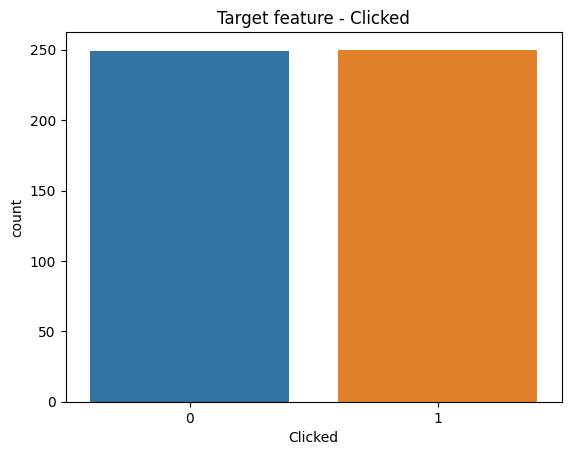

In [962]:
df['Clicked'].value_counts()

sns.countplot(x=df['Clicked'])
plt.title('Target feature - Clicked')

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

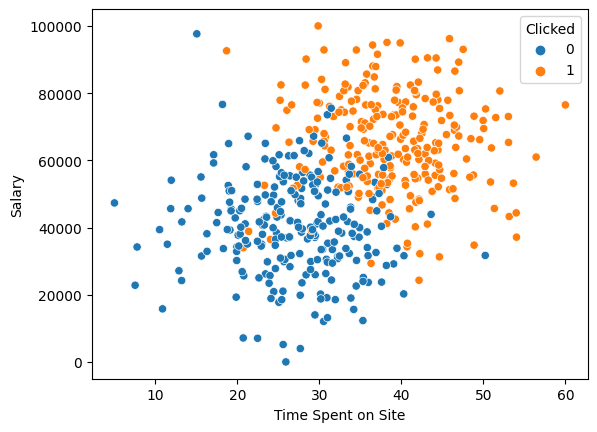

In [963]:



sns.scatterplot(x = 'Time Spent on Site', y = 'Salary', data = df, hue='Clicked' )

<AxesSubplot:xlabel='Clicked', ylabel='Time Spent on Site'>

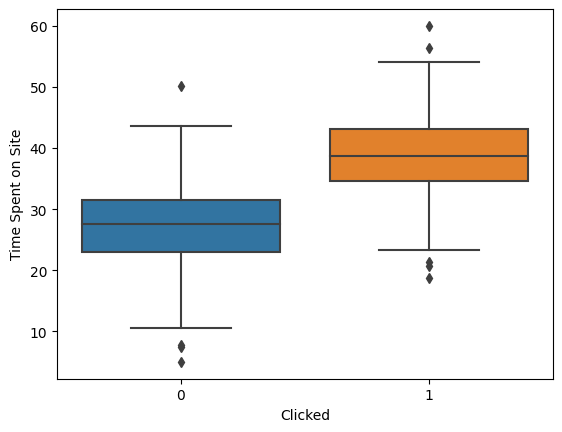

In [964]:
sns.boxplot(x = df['Clicked'], y =  df['Time Spent on Site'], data=df )

<AxesSubplot:xlabel='Clicked', ylabel='Salary'>

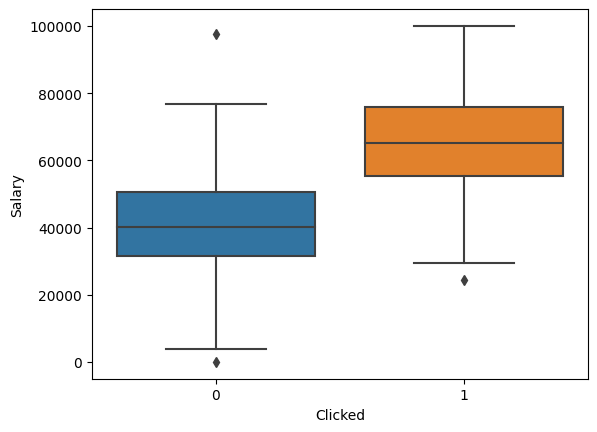

In [965]:
sns.boxplot(x = df['Clicked'], y =  df['Salary'], data=df )

In [966]:

target = df['Clicked']

df.drop(['Clicked', 'Names', 'emails', 'Country'], axis=1, inplace=True)


In [967]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
scaled_data= scaler.fit_transform(df)



In [968]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.3)

In [969]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [970]:
y_pred_train=log_reg.predict(X_train)
y_pred=log_reg.predict(X_test)

In [971]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [972]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       162
           1       0.91      0.93      0.92       187

    accuracy                           0.91       349
   macro avg       0.91      0.91      0.91       349
weighted avg       0.91      0.91      0.91       349



In [973]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        87
           1       0.81      0.97      0.88        63

    accuracy                           0.89       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.91      0.89      0.89       150



<AxesSubplot:>

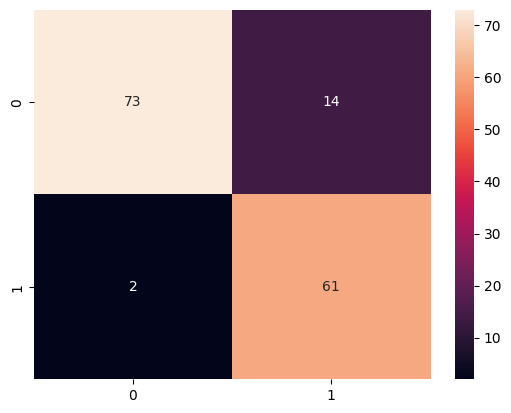

In [974]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [975]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


(-1.0, 1.9700000000000024)

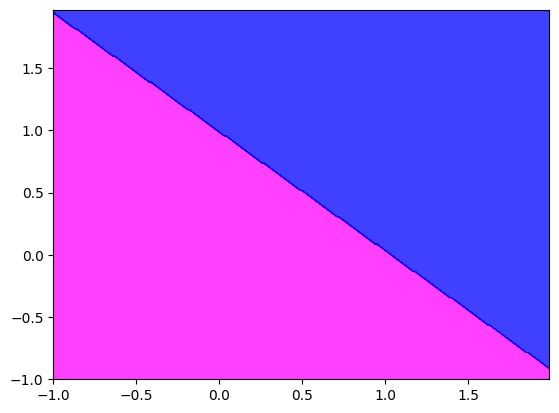

In [976]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


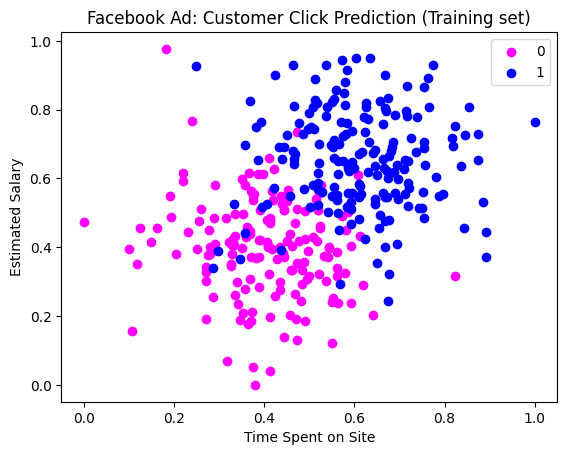

In [977]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


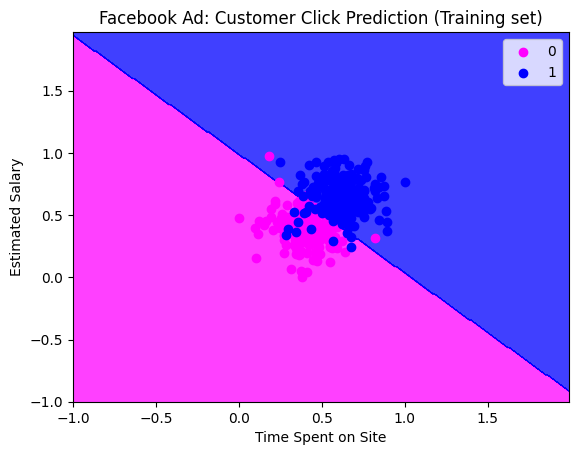

In [978]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [979]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)


LinearSVC()

In [980]:

svc_train_predict=model.predict(X_train)
svc_predict=model.predict(X_test)


In [981]:
print(classification_report(y_train, svc_train_predict))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       162
           1       0.92      0.93      0.92       187

    accuracy                           0.92       349
   macro avg       0.92      0.92      0.92       349
weighted avg       0.92      0.92      0.92       349



In [982]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        87
           1       0.82      0.95      0.88        63

    accuracy                           0.89       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.90      0.89      0.89       150



<AxesSubplot:>

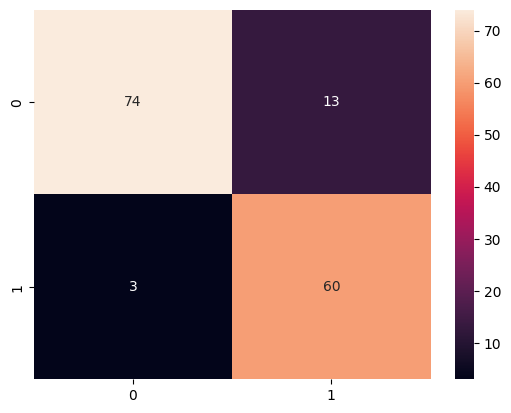

In [983]:
sns.heatmap(confusion_matrix(y_test,svc_predict,), annot=True)